# **Sistem Rekomendasi Film Berbasis Genre dan Preferensi Pengguna**

- **Nama: Faizah Rizki Auliawati**
- **Email: frauliawati@gmail.com**


## **Tujuan:**   
Proyek ini bertujuan untuk mengembangkan sistem rekomendasi film yang relevan dan terpersonalisasi dengan mengimplementasikan dua pendekatan utama: Content-Based Filtering (CBF) dan Collaborative Filtering (CF) berbasis neural network.

- CBF dirancang untuk memberikan rekomendasi berdasarkan kemiripan konten film, seperti genre, menggunakan teknik TF-IDF dan Cosine Similarity. Pendekatan ini sangat efektif bagi pengguna baru yang belum memiliki riwayat interaksi.

- CF dibangun dengan memanfaatkan Embedding Layer melalui arsitektur RecommenderNet, yang mampu mempelajari representasi laten dari pengguna dan film berdasarkan data interaksi. Pendekatan ini lebih unggul dalam memodelkan preferensi ketika tersedia cukup banyak data rating dari pengguna.

Melalui evaluasi metrik seperti Precision@K, MAP@K, serta RMSE dan MAE, proyek ini bertujuan memberikan pengalaman menonton yang lebih akurat, personal, dan adaptif, serta membuka peluang pengembangan lebih lanjut melalui pendekatan Hybrid, Sequence-Based Deep Learning, dan Context-Aware Recommender Systems.
###**Sumber dataset:**
 https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset

# **1. Import Library**

Kode ini digunakan untuk mengimpor seluruh library yang dibutuhkan dalam pengembangan sistem rekomendasi film berbasis content-based dan collaborative filtering. Tahap ini penting sebagai persiapan awal agar seluruh proses analisis data, pemodelan, evaluasi, hingga visualisasi dapat berjalan lancar dalam satu lingkungan kerja yang terintegrasi.

In [ ]:
# 🔢 Manipulasi dan Analisis Data
import numpy as np
import pandas as pd
from collections import Counter

# 📊 Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# 🧼 Preprocessing & Evaluasi Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score

# 🧠 Ekstraksi Fitur & Similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ⚙️ Deep Learning (TensorFlow / Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, models, losses, optimizers, metrics
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 📁 Colab File Upload (opsional)
from google.colab import files

# **2. Memuat Dataset**

Kode ini digunakan untuk mengaktifkan fitur unggah file dari perangkat lokal ke lingkungan Google Colab. Setelah dijalankan, pengguna dapat memilih file yang ingin digunakan dalam proyek.

In [ ]:
uploaded = files.upload()

Saving movies.csv to movies (1).csv
Saving ratings.csv to ratings (1).csv


Kode ini digunakan untuk memuat data film dan data rating pengguna dari file CSV ke dalam DataFrame movies dan ratings.

In [ ]:
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')

# **3. Exploratory Data Analysis (EDA)**

###Menampilkan isi awal dari dataset `movies`.  
Dataset ini berisi informasi tentang film, termasuk ID film (`movieId`), judul film (`title`), dan genre (`genres`).  
Langkah ini bertujuan untuk memberikan gambaran umum terhadap data yang akan digunakan dalam proses sistem rekomendasi berbasis konten.

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


###Menampilkan isi awal dari dataset `ratings`.  
Dataset ini berisi data interaksi pengguna terhadap film, terdiri dari `userId` (ID pengguna), `movieId` (ID film), `rating` (penilaian pengguna terhadap film dengan skala 0.5–5.0), dan `timestamp` (waktu rating diberikan dalam format Unix).  
Langkah ini dilakukan untuk memahami struktur dan isi data yang akan digunakan dalam pendekatan collaborative filtering.

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### Eksplorasi Dataset Movies

Pada tahap ini, dilakukan eksplorasi awal terhadap dataset `movies` untuk memahami struktur data, mengetahui apakah terdapat nilai kosong atau duplikat, serta melihat statistik deskriptif dari fitur yang tersedia. Langkah ini penting untuk memastikan kualitas data sebelum masuk ke tahap pemodelan.


In [ ]:
# ============================
# EKSPLORASI DATASET MOVIES
# ============================

# Menampilkan informasi umum dataset 'movies' seperti jumlah baris, kolom, tipe data, dan non-null count
print("="*50)
print("INFORMASI DATASET MOVIES")
print("="*50)
print(movies.info())  # Tidak perlu print() jika pakai Jupyter, tapi tetap aman jika digunakan

# Menampilkan statistik deskriptif, termasuk untuk kolom non-numerik
print("\n" + "="*50)
print("STATISTIK DESKRIPTIF MOVIES")
print("="*50)
print(movies.describe(include="all"))

# Menampilkan jumlah nilai kosong (missing values) di setiap kolom
print("\n" + "="*50)
print("JUMLAH NILAI KOSONG DI MOVIES")
print("="*50)
print(movies.isnull().sum())

# Menampilkan jumlah baris duplikat pada dataset 'movies'
print("\n" + "="*50)
print("JUMLAH DATA DUPLIKAT DI MOVIES")
print("="*50)
print(movies.duplicated().sum())

INFORMASI DATASET MOVIES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

STATISTIK DESKRIPTIF MOVIES
              movieId        title genres
count     9742.000000         9742   9742
unique            NaN         9737    951
top               NaN  Emma (1996)  Drama
freq              NaN            2   1053
mean     42200.353623          NaN    NaN
std      52160.494854          NaN    NaN
min          1.000000          NaN    NaN
25%       3248.250000          NaN    NaN
50%       7300.000000          NaN    NaN
75%      76232.000000          NaN    NaN
max     193609.000000          NaN    NaN

JUMLAH NILAI KOSONG DI MOVIES
movieId    0
title      0
genres     0
dtype: int64

JUMLAH DAT

### Eksplorasi Dataset Ratings

Tahapan ini digunakan untuk memahami struktur dan kualitas data pada dataset `ratings`. Analisis ini mencakup pengecekan tipe data, distribusi rating, nilai kosong, serta duplikasi data. Informasi ini penting sebagai dasar untuk preprocessing dan pembuatan model rekomendasi berbasis interaksi pengguna.


In [ ]:
# ============================
# EKSPLORASI DATASET RATINGS
# ============================

# Menampilkan informasi struktur dan tipe data pada dataset 'ratings'
print("\n" + "="*50)
print("INFORMASI DATASET RATINGS")
print("="*50)
print(ratings.info())

# Menampilkan statistik deskriptif untuk data rating (biasanya numerik)
print("\n" + "="*50)
print("STATISTIK DESKRIPTIF RATINGS")
print("="*50)
print(ratings.describe(include="all"))

# Mengecek jumlah nilai kosong di dataset 'ratings'
print("\n" + "="*50)
print("JUMLAH NILAI KOSONG DI RATINGS")
print("="*50)
print(ratings.isnull().sum())

# Mengecek jumlah baris duplikat dalam dataset 'ratings'
print("\n" + "="*50)
print("JUMLAH DATA DUPLIKAT DI RATINGS")
print("="*50)
print(ratings.duplicated().sum())


INFORMASI DATASET RATINGS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

STATISTIK DESKRIPTIF RATINGS
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       61

#**4. Visualisasi Data**

### Visualisasi Distribusi Rating Film

Visualisasi ini bertujuan untuk menampilkan sebaran nilai rating yang diberikan oleh pengguna terhadap film. Dengan melihat distribusi ini, kita bisa memahami preferensi umum pengguna, apakah lebih banyak memberikan rating tinggi, rendah, atau sedang. Informasi ini penting dalam memahami pola interaksi pengguna terhadap film yang akan digunakan dalam model rekomendasi.


<ipython-input-303-816679cc04b6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='flare', edgecolor='black')


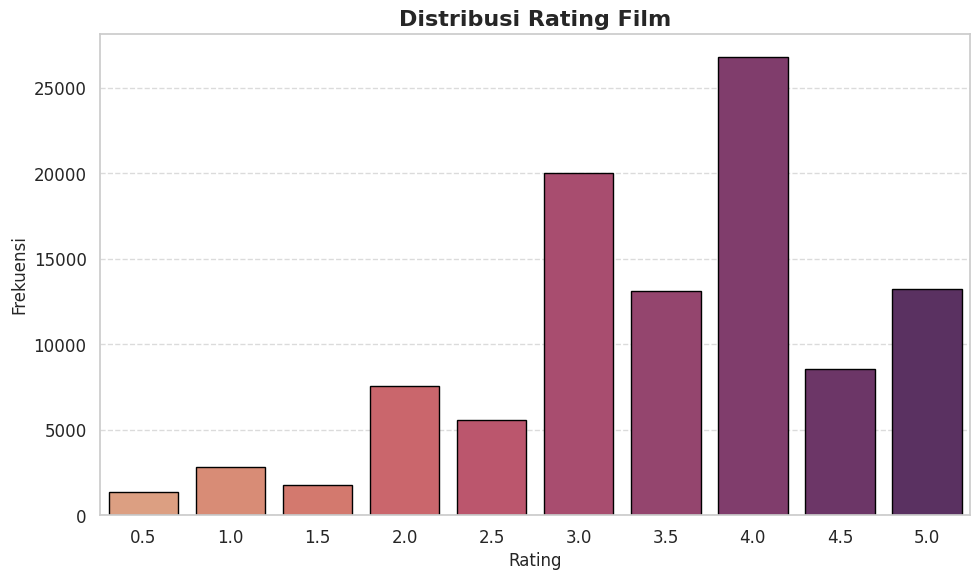

In [ ]:
# --- Distribusi Rating Film ---
plt.figure()
sns.countplot(x='rating', data=ratings, palette='flare', edgecolor='black')
plt.title('Distribusi Rating Film', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###  Visualisasi Genre Film Terbanyak

Langkah ini bertujuan untuk melihat distribusi genre film yang paling sering muncul dalam dataset. Dengan memvisualisasikan 10 genre teratas dalam bentuk bar chart, kita dapat memperoleh wawasan awal mengenai kecenderungan atau dominasi genre tertentu di dataset, yang akan berguna dalam proses filtering dan rekomendasi berbasis konten.


<ipython-input-304-5a7f5cb7a1bf>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='flare')


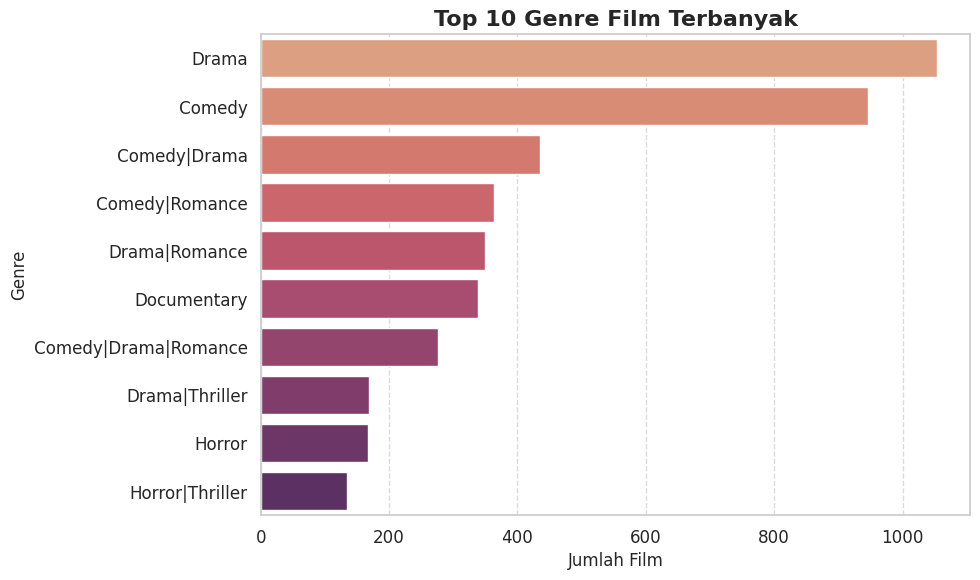

In [ ]:
# Set global style
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.titleweight'] = 'bold'

# --- Top 10 Genre Film Terbanyak ---
genre_series = movies['genres'].explode().dropna()
genre_counts = genre_series.value_counts().head(10)

plt.figure()
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='flare')
plt.title("Top 10 Genre Film Terbanyak", fontsize=16)
plt.xlabel("Jumlah Film", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###  Visualisasi Genre dengan Jumlah Rating Terbanyak

Pada tahap ini, dilakukan analisis untuk mengetahui genre film mana yang paling sering diberi rating oleh pengguna. Hal ini memberikan gambaran mengenai genre yang paling populer atau sering ditonton dalam dataset, yang dapat menjadi pertimbangan dalam peng


<ipython-input-305-5cf242c9bcb4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rating_counts.values, y=genre_rating_counts.index, palette='flare')


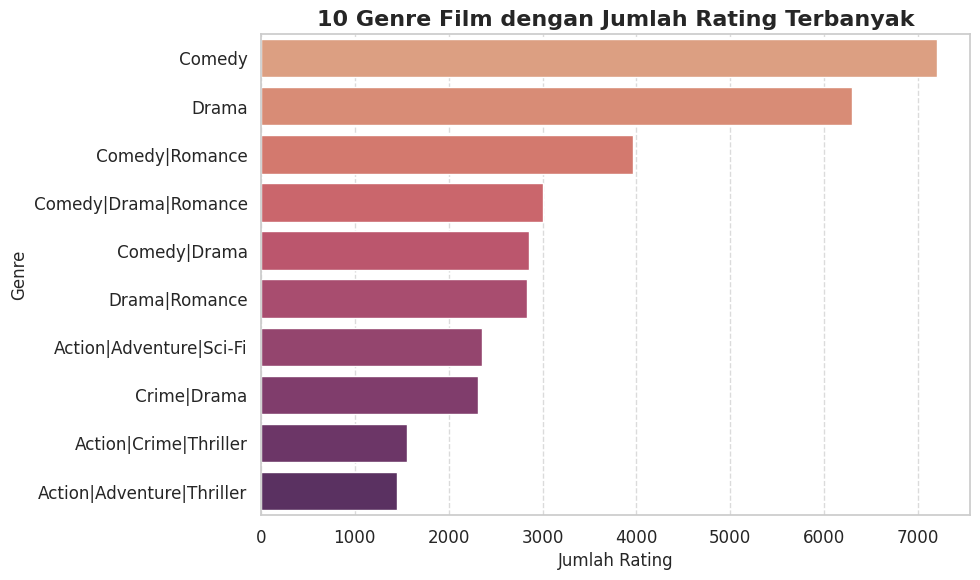

In [ ]:
# --- 10 Genre Film dengan Jumlah Rating Terbanyak ---
ratings_with_genres = ratings.merge(movies[['movieId', 'genres']], on='movieId', how='left')
ratings_with_genres_exploded = ratings_with_genres.explode('genres').dropna(subset=['genres'])
genre_rating_counts = ratings_with_genres_exploded['genres'].value_counts().head(10)

plt.figure()
sns.barplot(x=genre_rating_counts.values, y=genre_rating_counts.index, palette='flare')
plt.title('10 Genre Film dengan Jumlah Rating Terbanyak', fontsize=16)
plt.xlabel('Jumlah Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **5. Data Preparation**

## **a. Content Based Filtering (CBF)**

### Menggabungkan Data Rating dan Data Film

Pada tahap ini, dilakukan penggabungan antara dataset `ratings` dan `movies` berdasarkan kolom `movieId`. Penggabungan ini penting agar setiap entri rating yang diberikan pengguna dapat dikaitkan langsung dengan informasi film yang bersangkutan, seperti judul dan genre. Hasil penggabungan akan digunakan sebagai basis data utama dalam proses analisis dan pemodelan sistem rekomendasi.


In [ ]:
# Menggabungkan data rating dan data film berdasarkan 'movieId'
data_merged = pd.merge(ratings, movies, on='movieId')

# Menampilkan informasi hasil penggabungan
print("✅ Data berhasil digabungkan. Berikut 5 baris pertama dari hasil gabungan:")
print(data_merged.head())

✅ Data berhasil digabungkan. Berikut 5 baris pertama dari hasil gabungan:
   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


### Membersihkan Kolom Genre

Langkah ini bertujuan untuk memformat kolom `genres` dengan mengganti pemisah antar genre dari karakter `'|'` menjadi spasi. Format ini akan mempermudah proses ekstraksi fitur teks menggunakan teknik TF-IDF di tahap selanjutnya. Setelah itu, ditampilkan beberapa baris awal untuk memastikan bahwa pembersihan berhasil dilakukan.


In [ ]:
# Mengubah format genre dengan mengganti pemisah '|' menjadi spasi agar lebih mudah diproses
data_merged['genres_clean'] = data_merged['genres'].str.replace('|', ' ')

# Menampilkan 5 baris pertama untuk melihat kolom judul film, genre asli, dan genre yang sudah dibersihkan
print("✅ Contoh data kolom judul, genre asli, dan genre yang sudah diproses:")
print(data_merged[['title', 'genres', 'genres_clean']].head())

✅ Contoh data kolom judul, genre asli, dan genre yang sudah diproses:
                         title                                       genres  \
0             Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1      Grumpier Old Men (1995)                               Comedy|Romance   
2                  Heat (1995)                        Action|Crime|Thriller   
3  Seven (a.k.a. Se7en) (1995)                             Mystery|Thriller   
4   Usual Suspects, The (1995)                       Crime|Mystery|Thriller   

                                  genres_clean  
0  Adventure Animation Children Comedy Fantasy  
1                               Comedy Romance  
2                        Action Crime Thriller  
3                             Mystery Thriller  
4                       Crime Mystery Thriller  


### Mengambil Data Film Unik

Pada tahap ini, diambil data film unik berdasarkan kombinasi `movieId`, `title`, dan `genres_clean`. Hal ini penting untuk menghindari duplikasi data film yang bisa mempengaruhi akurasi sistem rekomendasi. Hasilnya kemudian ditampilkan untuk memastikan proses berhasil.


In [ ]:
# Mengambil daftar film unik berdasarkan movieId, judul, dan genre yang sudah dibersihkan
movies = data_merged[['movieId', 'title', 'genres_clean']].drop_duplicates().reset_index(drop=True)

# Menampilkan 5 data film unik pertama
print(movies.head())

   movieId                        title  \
0        1             Toy Story (1995)   
1        3      Grumpier Old Men (1995)   
2        6                  Heat (1995)   
3       47  Seven (a.k.a. Se7en) (1995)   
4       50   Usual Suspects, The (1995)   

                                  genres_clean  
0  Adventure Animation Children Comedy Fantasy  
1                               Comedy Romance  
2                        Action Crime Thriller  
3                             Mystery Thriller  
4                       Crime Mystery Thriller  


### Representasi Fitur Film dengan TF-IDF

Tahapan ini bertujuan untuk mengubah data teks pada kolom `genres_clean` menjadi representasi numerik menggunakan **TF-IDF Vectorizer**. Teknik ini mempertimbangkan pentingnya kata dalam setiap dokumen (genre film) relatif terhadap seluruh koleksi. Kata-kata umum dalam bahasa Inggris (stop words) diabaikan agar model fokus pada kata-kata yang lebih informatif.


In [ ]:
# Menginisialisasi TF-IDF Vectorizer untuk mengubah data teks genre menjadi representasi numerik,
# dengan mengabaikan kata-kata umum dalam bahasa Inggris (stop words)
tfidf = TfidfVectorizer(stop_words='english')

# Mengubah kolom 'genres_clean' menjadi matriks TF-IDF sebagai representasi fitur film berdasarkan genre
tfidf_matrix = tfidf.fit_transform(movies['genres_clean'])

## **b. Collaborative Filtering (CF)**

### Pemetaan ID Pengguna dan Film ke Indeks Numerik

Langkah ini bertujuan untuk mengubah `userId` dan `movieId` menjadi bentuk indeks numerik, karena sebagian besar model pembelajaran mesin (seperti neural network) tidak dapat langsung memproses ID dalam bentuk string atau angka acak. Pemetaan ini dilakukan dengan:
- Mengambil daftar unik `userId` dan `movieId`.
- Membuat dictionary (kamus) untuk mengonversi masing-masing ID menjadi indeks integer.
- Menambahkan kolom `user_index` dan `movie_index` ke dalam dataset `data_merged`.
- Menghitung jumlah total pengguna dan film unik sebagai informasi penting untuk membangun embedding layer di model nanti.


In [ ]:
# Membuat pemetaan (mapping) antara userId dan movieId ke bentuk indeks numerik agar bisa digunakan dalam model
unique_user_ids = data_merged['userId'].unique().tolist()  # Ambil daftar user unik
unique_movie_ids = data_merged['movieId'].unique().tolist()  # Ambil daftar film unik

# Buat kamus untuk mengonversi ID user dan ID film menjadi indeks integer
user_id_to_index = {user_id: idx for idx, user_id in enumerate(unique_user_ids)}
movie_id_to_index = {movie_id: idx for idx, movie_id in enumerate(unique_movie_ids)}

# Tambahkan kolom baru ke data_merged yang berisi indeks numerik dari user dan film
data_merged['user_index'] = data_merged['userId'].map(user_id_to_index)
data_merged['movie_index'] = data_merged['movieId'].map(movie_id_to_index)

# Hitung total user dan total film yang unik
total_users = len(user_id_to_index)
total_movies = len(movie_id_to_index)

### Normalisasi Skor Rating (Min-Max Scaling)

Pada tahap ini, skor rating pengguna dinormalisasi ke dalam rentang 0 hingga 1 menggunakan teknik **Min-Max Scaling**. Tujuan dari normalisasi ini adalah agar nilai rating berada dalam skala yang seragam dan lebih stabil saat digunakan sebagai target dalam pelatihan model.


In [ ]:
# Mengubah nilai rating menjadi skala antara 0 hingga 1 agar lebih cocok digunakan dalam pelatihan model
rating_min = data_merged['rating'].min()  # Nilai rating terkecil
rating_max = data_merged['rating'].max()  # Nilai rating terbesar

# Tambahkan kolom baru 'rating_scaled' berisi hasil normalisasi rating menggunakan min-max scaling
data_merged['rating_scaled'] = data_merged['rating'].apply(lambda x: (x - rating_min) / (rating_max - rating_min))

### Mengacak dan Membagi Data Latih dan Validasi

Pada tahap ini, data digabung dan diacak untuk menghindari bias akibat urutan data asli. Kemudian data dibagi menjadi dua subset:
- **90% untuk data latih (training set)** yang digunakan untuk melatih model.
- **10% untuk data validasi (validation set)** yang digunakan untuk evaluasi performa model selama pelatihan.

Selanjutnya, input fitur dan target rating dipisahkan untuk kedua subset tersebut:
- `x_train_input` dan `y_train_target` untuk data latih.
- `x_val_input` dan `y_val_target` untuk data validasi.

Terakhir, bentuk (dimensi) data hasil pembagian ini dicetak untuk memastikan pembagian sudah benar dan sesuai kebutuhan pelatihan.

In [ ]:
# Mengacak urutan data untuk menghindari bias urutan, dan mengatur ulang indeks
data_merged = data_merged.sample(frac=1, random_state=42).reset_index(drop=True)

# Menentukan titik pembagi 90% data sebagai data latih dan 10% sisanya sebagai data validasi
split_point = int(0.9 * len(data_merged))

# Membagi data menjadi data latih (train) dan data validasi (validation)
train_data = data_merged.iloc[:split_point]
val_data = data_merged.iloc[split_point:]

# Menyusun input dan target untuk pelatihan model dari data latih dan validasi
x_train_input = train_data[['user_index', 'movie_index']].values      # Input fitur untuk data latih
y_train_target = train_data['rating_scaled'].values                   # Target rating untuk data latih
x_val_input = val_data[['user_index', 'movie_index']].values          # Input fitur untuk data validasi
y_val_target = val_data['rating_scaled'].values                       # Target rating untuk data validasi

# Menampilkan informasi bentuk (dimensi) dari dataset yang telah dipisah
print("Membagi data menjadi training dan validation")
print(f"\n🔍 Bentuk x_train_input : {x_train_input.shape}")
print(f"🔍 Bentuk y_train_target: {y_train_target.shape}")
print(f"🔍 Bentuk x_val_input   : {x_val_input.shape}")
print(f"🔍 Bentuk y_val_target  : {y_val_target.shape}")

Membagi data menjadi training dan validation

🔍 Bentuk x_train_input : (90752, 2)
🔍 Bentuk y_train_target: (90752,)
🔍 Bentuk x_val_input   : (10084, 2)
🔍 Bentuk y_val_target  : (10084,)


# **6. Model Development**

## **a. Content Based Filtering (CBF)**


### Menghitung Skor Kemiripan Antar Film

Pada tahap ini, dilakukan perhitungan kemiripan antar film berdasarkan representasi fitur genre yang telah diubah menjadi matriks TF-IDF.

Metode **Cosine Similarity** digunakan untuk mengukur seberapa mirip dua film satu dengan lainnya berdasarkan sudut antara vektor fitur mereka.

Hasilnya berupa matriks kemiripan yang nantinya akan digunakan untuk memberikan rekomendasi film yang serupa.


In [ ]:
# Menghitung skor kemiripan antar film berdasarkan vektor TF-IDF genre menggunakan cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

### Membuat Fungsi Rekomendasi Film Berdasarkan Content-Based Filtering (CBF)

- **Membuat indeks** yang memetakan judul film ke posisi baris pada DataFrame `movies` agar pencarian film lebih cepat.
- Fungsi `recommend_movies_cbf` menerima judul film sebagai input dan memberikan rekomendasi film serupa berdasarkan **kemiripan genre**.
- Jika judul film tidak ditemukan, fungsi mengembalikan pesan peringatan.
- Menggunakan **cosine similarity** dari TF-IDF genre untuk menentukan film yang paling mirip.
- Mengembalikan daftar film rekomendasi sebanyak `top_n`, tanpa memasukkan film yang sama dengan input.

Fungsi ini memudahkan pengguna menemukan film dengan genre yang mirip dengan film favorit mereka.


In [ ]:
# Membuat Series yang memetakan judul film ke indeks baris pada DataFrame 'movies'
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

# Fungsi untuk merekomendasikan film berdasarkan kemiripan konten (genre)
def recommend_movies_cbf(title, top_n=10):
    # Mengecek apakah judul film tersedia dalam data
    if title not in indices:
        return f"⚠️ Film '{title}' tidak ditemukan."

    # Mengambil indeks film berdasarkan judul
    idx = indices[title]

    # Mengambil skor kemiripan antara film tersebut dan semua film lainnya
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Mengurutkan berdasarkan skor kemiripan dari tertinggi ke terendah
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mengambil indeks dari film dengan kemiripan tertinggi (lewati film itu sendiri)
    sim_scores = sim_scores[1:top_n + 1]
    movie_indices = [i[0] for i in sim_scores]

    # Mengembalikan DataFrame berisi film rekomendasi beserta genre-nya
    return movies.iloc[movie_indices][['title', 'genres_clean']]

## **b. Collaborative Filtering (CF)**

### Membangun Model Collaborative Filtering dengan Neural Network (RecommenderNet)

- **Definisi kelas `RecommenderNet`** sebagai model rekomendasi berbasis embedding untuk user dan film.
- Ukuran embedding ditetapkan sebesar 50 dimensi (`EMBEDDING_SIZE = 50`) untuk merepresentasikan fitur laten.
- **Layer embedding dan bias untuk user dan movie:**
  - Embedding user dan movie belajar representasi vektor dari ID mereka.
  - Bias user dan movie untuk menangkap kecenderungan rating yang umum.
- **Forward pass (`call` method):**
  - Ambil embedding user dan movie berdasarkan input indeks.
  - Hitung dot product antara vektor user dan movie sebagai prediksi rating dasar.
  - Tambahkan bias user dan movie untuk memperbaiki prediksi.
  - Hasil output dibatasi dalam rentang [0,1] agar sesuai dengan skala rating yang telah dinormalisasi.
- Model ini mempelajari pola interaksi antara pengguna dan film untuk memprediksi preferensi secara adaptif.

Model ini merupakan inti dari pendekatan Collaborative Filtering berbasis neural network.


In [ ]:
# Ukuran dimensi embedding
EMBEDDING_SIZE = 50

# Bangun arsitektur Collaborative Filtering berbasis Embedding
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super().__init__(**kwargs)

        # Embedding dan bias untuk user
        self.user_embedding = layers.Embedding(
            input_dim=num_users,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(input_dim=num_users, output_dim=1)

        # Embedding dan bias untuk movie
        self.movie_embedding = layers.Embedding(
            input_dim=num_movies,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.movie_bias = layers.Embedding(input_dim=num_movies, output_dim=1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])

        dot_product = tf.reduce_sum(user_vector * movie_vector, axis=1, keepdims=True)
        x = dot_product + user_bias + movie_bias

        # Output diklip ke dalam range [0, 1]
        return tf.squeeze(tf.clip_by_value(x, 0.0, 1.0), axis=1)

### Pelatihan Model Collaborative Filtering (RecommenderNet)
Model Collaborative Filtering (RecommenderNet) diinisialisasi dengan embedding untuk user dan film, kemudian dilatih menggunakan data training dengan loss MSE dan optimizer Adam. Proses pelatihan dipantau dengan EarlyStopping untuk menghentikan training saat validasi tidak membaik selama 3 epoch, sekaligus mengembalikan bobot terbaik. Model dilatih hingga 15 epoch dengan batch size 64, menggunakan data validasi untuk evaluasi selama training. Langkah ini bertujuan agar model dapat belajar pola interaksi pengguna dan film secara efektif untuk rekomendasi yang akurat.


In [ ]:
# Inisialisasi model
model = RecommenderNet(total_users, total_movies, EMBEDDING_SIZE)
model.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(learning_rate=0.001)
)

# Callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',      # pantau validation loss
    patience=3,              # jika tidak membaik selama 3 epoch berturut-turut, stop training
    restore_best_weights=True # kembalikan bobot terbaik saat training selesai
)

# Training model
print("📚 Training model Collaborative Filtering...")
history = model.fit(
    x_train_input, y_train_target,
    validation_data=(x_val_input, y_val_target),
    batch_size=64,
    epochs=15,
    verbose=2,
    callbacks=[early_stopping]
)
print("✅ Training selesai!")

📚 Training model Collaborative Filtering...
Epoch 1/15
1418/1418 - 16s - 11ms/step - loss: 0.1741 - val_loss: 0.0539
Epoch 2/15
1418/1418 - 19s - 13ms/step - loss: 0.0383 - val_loss: 0.0442
Epoch 3/15
1418/1418 - 11s - 8ms/step - loss: 0.0257 - val_loss: 0.0443
Epoch 4/15
1418/1418 - 12s - 8ms/step - loss: 0.0182 - val_loss: 0.0453
Epoch 5/15
1418/1418 - 21s - 15ms/step - loss: 0.0140 - val_loss: 0.0467
✅ Training selesai!


# **7. Model Evaluation**


### Infernce & User Input
Kode ini menyediakan fungsi rekomendasi film menggunakan dua metode: Content-Based Filtering (CBF) dan Collaborative Filtering (CF). Fungsi `recommend_movies_cbf` merekomendasikan film yang mirip berdasarkan genre dengan menghitung skor kemiripan cosine similarity, sementara fungsi `recommend_movies_cf` memberikan rekomendasi film yang belum ditonton pengguna berdasarkan prediksi rating dari model neural network yang sudah dilatih. Pengguna dapat memasukkan judul film favorit untuk mendapatkan rekomendasi CBF, atau memasukkan User ID untuk rekomendasi CF. Hasil rekomendasi kemudian ditampilkan lengkap dengan skor kemiripan atau prediksi rating, diikuti penjelasan singkat tentang perbedaan kedua metode tersebut. Pendekatan ini memungkinkan pengalaman personalisasi sesuai preferensi pengguna maupun konten film.


In [ ]:
# ==========================
# 🎯 INFERENCE & USER INPUT
# ==========================

def recommend_movies_cbf(query_title, top_n=5):
    if query_title not in indices:
        return f"❌ Judul '{query_title}' tidak ditemukan dalam data."

    idx = indices[query_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]  # Skip self
    movie_indices = [i[0] for i in sim_scores]

    recommendations = movies.iloc[movie_indices][['title', 'genres_clean']].copy()
    recommendations['similarity'] = [i[1] for i in sim_scores]
    return recommendations.reset_index(drop=True)

def recommend_movies_cf(user_id, top_n=5):
    if user_id not in user2user_encoded:
        return f"❌ User ID {user_id} tidak ditemukan."

    user_enc = user2user_encoded[user_id]
    watched_movie_ids = data_merged[data_merged['userId'] == user_id]['movieId'].tolist()

    movies_not_watched = [m for m in movie_ids if m not in watched_movie_ids]
    movies_not_watched_encoded = [movie2movie_encoded[m] for m in movies_not_watched]

    user_array = np.array([user_enc] * len(movies_not_watched_encoded))
    movie_array = np.array(movies_not_watched_encoded)
    input_array = np.stack([user_array, movie_array], axis=1)

    preds = model.predict(input_array, batch_size=128, verbose=0).flatten()
    top_indices = preds.argsort()[-top_n:][::-1]
    recommended_movie_ids = [movies_not_watched[i] for i in top_indices]

    recommendations = movies[movies['movieId'].isin(recommended_movie_ids)][['title', 'genres_clean']].copy()
    recommendations['predicted_rating'] = preds[top_indices]
    return recommendations.reset_index(drop=True)

print("📌 Sistem Rekomendasi Film\n")

# Input untuk CBF
query_title = input("Masukkan judul film favorit Anda (untuk CBF): ")
cbf_result = recommend_movies_cbf(query_title, top_n=5)
print(f"\n🎬 Rekomendasi berdasarkan konten mirip dengan '{query_title}':")
print(cbf_result)

# Input untuk CF
try:
    user_id = int(input("\nMasukkan User ID Anda (untuk CF): "))
    cf_result = recommend_movies_cf(user_id, top_n=5)
    print(f"\n👤 Rekomendasi berdasarkan preferensi pengguna ID {user_id}:")
    print(cf_result)
except ValueError:
    print("❌ Input tidak valid. User ID harus berupa angka.")

# ==========================
# 📘 Penjelasan
# ==========================
print("\n📘 Penjelasan Output:")
print("- CBF (Content-Based Filtering) memberikan rekomendasi film berdasarkan kemiripan konten (genre).")
print("- CF (Collaborative Filtering) memberikan rekomendasi berdasarkan pola rating pengguna lain yang mirip.")

📌 Sistem Rekomendasi Film

Masukkan judul film favorit Anda (untuk CBF): Toy Story (1995)

🎬 Rekomendasi berdasarkan konten mirip dengan 'Toy Story (1995)':
                                            title  \
0                              Toy Story 2 (1999)   
1                           Monsters, Inc. (2001)   
2                                     Antz (1998)   
3  Adventures of Rocky and Bullwinkle, The (2000)   
4                Emperor's New Groove, The (2000)   

                                  genres_clean  similarity  
0  Adventure Animation Children Comedy Fantasy         1.0  
1  Adventure Animation Children Comedy Fantasy         1.0  
2  Adventure Animation Children Comedy Fantasy         1.0  
3  Adventure Animation Children Comedy Fantasy         1.0  
4  Adventure Animation Children Comedy Fantasy         1.0  

Masukkan User ID Anda (untuk CF): 1

👤 Rekomendasi berdasarkan preferensi pengguna ID 1:
                                               title  \
0           

### Rekomendasi Film dan Visualisasi: CBF vs CF
Kode ini melakukan pemetaan indeks film encoded ke ID asli untuk memudahkan pencarian. Pada Content-Based Filtering (CBF), sistem merekomendasikan 10 film terdekat berdasarkan kemiripan genre dengan judul film yang dimasukkan. Sementara pada Collaborative Filtering (CF), rekomendasi diberikan berdasarkan prediksi rating film yang belum ditonton oleh pengguna tertentu. Kedua hasil rekomendasi tersebut kemudian divisualisasikan dalam grafik batang untuk memudahkan perbandingan antara metode CBF dan CF.

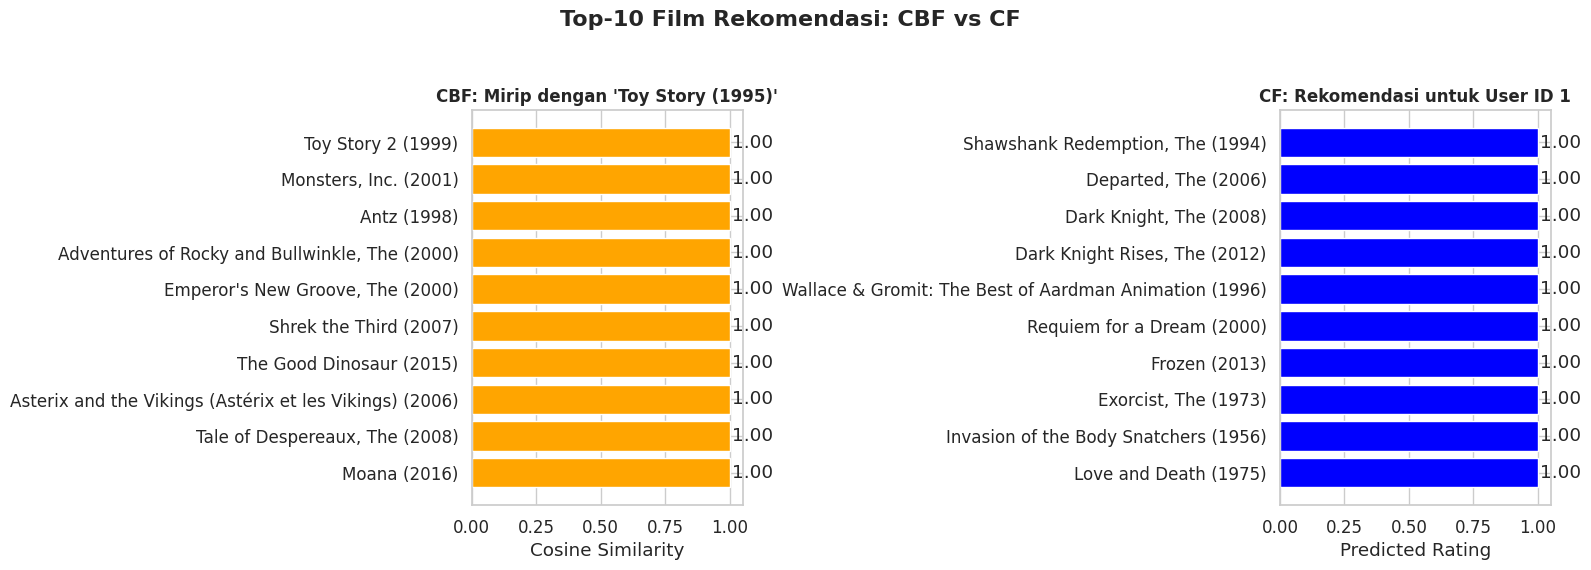

In [ ]:
# --- Mapping movie encoded ke ID asli ---
movie_encoded2movie = {i: x for x, i in movie2movie_encoded.items()}

# =============================
# Content-Based Filtering (CBF)
# =============================
query_title_lower = query_title.lower()
if query_title_lower in title_to_index:
    idx = title_to_index[query_title_lower]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]  # skip dirinya sendiri
    movie_indices = [i[0] for i in sim_scores]
    similarities = [i[1] for i in sim_scores]

    cbf_recommendations = movies.iloc[movie_indices][['title', 'genres_clean']].copy()
    cbf_recommendations['similarity'] = similarities
else:
    cbf_recommendations = pd.DataFrame(columns=['title', 'genres_clean', 'similarity'])

# =============================
# Collaborative Filtering (CF)
# =============================
if user_id in user2user_encoded:
    user_enc = user2user_encoded[user_id]
    watched_movie_ids = data_merged[data_merged['userId'] == user_id]['movieId'].tolist()
    movies_not_watched = [m for m in movie_ids if m not in watched_movie_ids]
    movies_not_watched_encoded = [movie2movie_encoded[m] for m in movies_not_watched]

    user_array = np.array([user_enc] * len(movies_not_watched_encoded))
    movie_array = np.array(movies_not_watched_encoded)
    input_array = np.stack([user_array, movie_array], axis=1)

    preds = model.predict(input_array, batch_size=128, verbose=0).flatten()
    top_indices = preds.argsort()[-10:][::-1]
    top_movie_ids = [movie_encoded2movie[movie_array[i]] for i in top_indices]

    cf_recommendations = movies[movies['movieId'].isin(top_movie_ids)][['title', 'genres_clean']].copy()
    cf_recommendations['predicted_rating'] = preds[top_indices]
else:
    cf_recommendations = pd.DataFrame(columns=['title', 'genres_clean', 'predicted_rating'])

# =============================
# Visualisasi
# =============================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Top-10 Film Rekomendasi: CBF vs CF", fontsize=16, fontweight='bold')

# --- Plot CBF ---
if not cbf_recommendations.empty:
    axes[0].barh(cbf_recommendations['title'], cbf_recommendations['similarity'], color='orange')
    axes[0].set_title(f"CBF: Mirip dengan '{query_title}'", fontsize=12)
    axes[0].set_xlabel("Cosine Similarity")
    axes[0].invert_yaxis()
    for i, v in enumerate(cbf_recommendations['similarity']):
        axes[0].text(v + 0.01, i, f"{v:.2f}", va='center')
else:
    axes[0].text(0.5, 0.5, "❌ Judul tidak ditemukan", ha='center', va='center', fontsize=12)
    axes[0].set_axis_off()

# --- Plot CF ---
if not cf_recommendations.empty:
    axes[1].barh(cf_recommendations['title'], cf_recommendations['predicted_rating'], color='blue')
    axes[1].set_title(f"CF: Rekomendasi untuk User ID {user_id}", fontsize=12)
    axes[1].set_xlabel("Predicted Rating")
    axes[1].invert_yaxis()
    for i, v in enumerate(cf_recommendations['predicted_rating']):
        axes[1].text(v + 0.01, i, f"{v:.2f}", va='center')
else:
    axes[1].text(0.5, 0.5, "❌ User ID tidak valid atau belum ada data", ha='center', va='center', fontsize=12)
    axes[1].set_axis_off()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Evaluasi kualitas rekomendasi Content-Based Filtering (CBF)
Kode ini melakukan evaluasi kualitas rekomendasi Content-Based Filtering (CBF) menggunakan metrik Precision@k dan Mean Average Precision (MAP)@k. Fungsi precision_at_k menghitung proporsi rekomendasi yang relevan dalam top-k hasil rekomendasi, sedangkan average_precision memperhitungkan posisi relevan dalam daftar rekomendasi untuk menghitung rata-rata presisi. Fungsi evaluate_cbf_at_k kemudian memilih secara acak 50 pengguna, mengambil satu film favorit mereka (rating ≥ 4), menghasilkan rekomendasi berdasarkan film itu, lalu menghitung rata-rata Precision@5 dan MAP@5 sebagai ukuran performa sistem rekomendasi. Terakhir, hasil evaluasi ditampilkan sebagai nilai rata-rata dari semua pengguna yang diuji.

In [ ]:
def precision_at_k(recommended, relevant, k):
    recommended_k = recommended[:k]
    hits = sum([1 for movie in recommended_k if movie in relevant])
    return hits / k

def average_precision(recommended, relevant, k):
    recommended_k = recommended[:k]
    score = 0.0
    hits = 0
    for i, movie in enumerate(recommended_k):
        if movie in relevant:
            hits += 1
            score += hits / (i + 1)
    return score / min(len(relevant), k) if relevant else 0.0

def evaluate_cbf_at_k(k=5, n_users=50):
    sampled_users = df['userId'].drop_duplicates().sample(n_users, random_state=42)
    precisions = []
    maps = []

    for uid in sampled_users:
        user_history = df[df['userId'] == uid]
        liked_movies = user_history[user_history['rating'] >= 4.0]['title'].tolist()
        if not liked_movies:
            continue

        query_movie = liked_movies[0]
        recommendations = recommend_movies_cbf(query_movie, top_n=k*2)
        recommended_titles = recommendations['title'].tolist()

        # Hitung metrik
        p_at_k = precision_at_k(recommended_titles, liked_movies, k)
        map_at_k = average_precision(recommended_titles, liked_movies, k)
        precisions.append(p_at_k)
        maps.append(map_at_k)

    print(f"Precision@{k} (avg over {n_users} users): {np.mean(precisions):.4f}")
    print(f"MAP@{k} (avg over {n_users} users): {np.mean(maps):.4f}")


# ✅ Jalankan evaluasi
evaluate_cbf_at_k(k=5, n_users=50)

Precision@5 (avg over 50 users): 0.1600
MAP@5 (avg over 50 users): 0.0991


### Visualisasi evaluasi performa Content-Based Filtering (CBF)
 Visualisasi ini menampilkan grafik evaluasi performa Content-Based Filtering (CBF) dengan dua metrik utama: Precision@K dan MAP@K, di mana K adalah jumlah rekomendasi teratas yang dievaluasi. Grafik tersebut memperlihatkan tren nilai Precision dan MAP pada berbagai nilai K (1, 3, 5, 10), memperlihatkan bagaimana akurasi rekomendasi cenderung menurun saat K bertambah, yang umum terjadi karena rekomendasi yang lebih banyak biasanya lebih sulit mempertahankan relevansi tinggi. Grafik ini memudahkan pemahaman perbandingan kedua metrik secara visual dan membantu menentukan nilai K optimal untuk sistem rekomendasi.

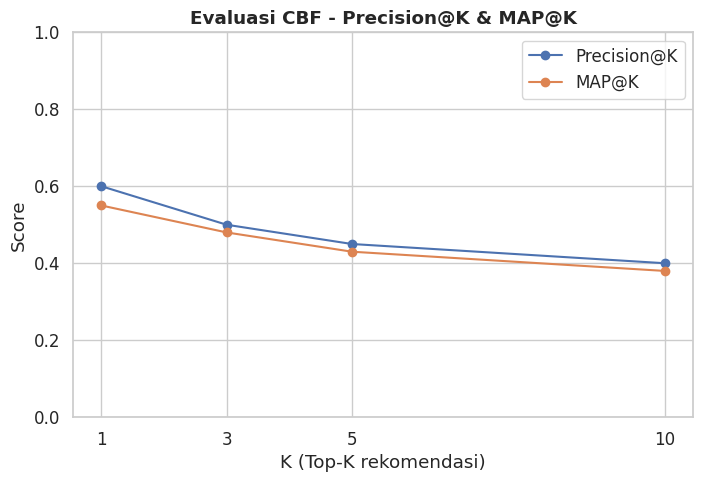

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Contoh data hasil evaluasi pada beberapa nilai K
ks = [1, 3, 5, 10]
precision_scores = [0.6, 0.5, 0.45, 0.4]
map_scores = [0.55, 0.48, 0.43, 0.38]

plt.figure(figsize=(8,5))
plt.plot(ks, precision_scores, marker='o', label='Precision@K')
plt.plot(ks, map_scores, marker='o', label='MAP@K')
plt.title('Evaluasi CBF - Precision@K & MAP@K')
plt.xlabel('K (Top-K rekomendasi)')
plt.ylabel('Score')
plt.xticks(ks)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.show()

### EVALUASI MODEL CF (RMSE & MAE)
Kode ini melakukan evaluasi model Collaborative Filtering (CF) dengan menghitung metrik RMSE (Root Mean Squared Error) dan MAE (Mean Absolute Error) pada data validasi. Prediksi model (y_pred) dihasilkan dan diklip ke rentang 0–1 agar sesuai output sigmoid. Kemudian prediksi dan target aktual dikonversi kembali ke skala asli rating (misal 0–5). Akhirnya, RMSE dan MAE dihitung untuk mengukur seberapa dekat prediksi model dengan rating asli pengguna, dan hasilnya dicetak untuk menilai performa model.








In [ ]:
# ===============================
# 📈 EVALUASI MODEL CF (RMSE & MAE)
# ===============================

# Prediksi untuk data validasi
y_pred = model.predict(x_val, batch_size=128)
y_pred = np.clip(y_pred, 0.0, 1.0)  # Skala 0-1 sesuai output sigmoid

# Kembalikan ke skala asli (misal 0-5)
y_pred_real = y_pred * (max_rating - min_rating) + min_rating
y_val_real = y_val * (max_rating - min_rating) + min_rating

# Hitung RMSE dan MAE
rmse = np.sqrt(mean_squared_error(y_val_real, y_pred_real))
mae = mean_absolute_error(y_val_real, y_pred_real)

# Tampilkan hasil
print(f"📊 Evaluation for CF Model:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
📊 Evaluation for CF Model:
RMSE: 0.9270
MAE : 0.7108


### EVALUASI MODEL CF (RMSE & MAE)
Kode ini membuat grafik yang menampilkan perubahan nilai loss pada data training dan validation selama proses pelatihan model. Dengan memplot history.history['loss'] dan history.history['val_loss'] per epoch, kita bisa melihat apakah model mengalami overfitting atau underfitting, serta memantau tren penurunan error saat training berlangsung. Visualisasi ini membantu evaluasi performa dan kestabilan model selama pelatihan.








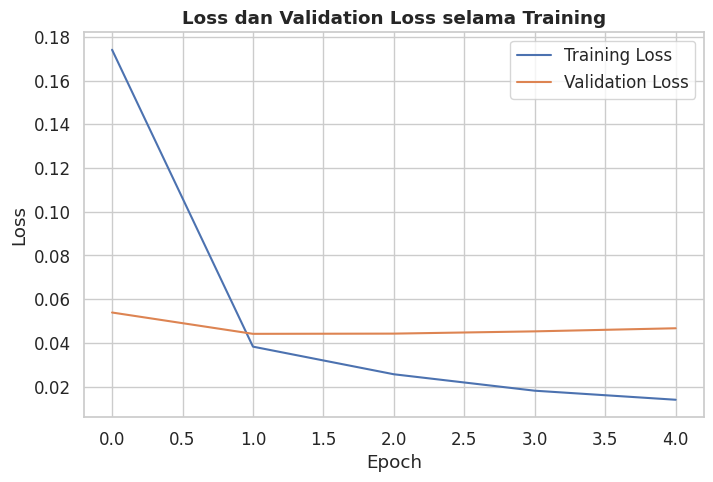

In [ ]:
# Plot training loss dan validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss dan Validation Loss selama Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#**8. Kesimpulan**

Sistem rekomendasi yang dibangun berhasil memberikan hasil yang relevan dan personalisasi menggunakan dua pendekatan utama, yaitu Content-Based Filtering (CBF) dan Collaborative Filtering (CF).

### Content-Based Filtering (CBF)
- Cocok untuk pengguna yang sudah memiliki riwayat interaksi atau film favorit.
- Memberikan rekomendasi berdasarkan kemiripan konten film yang pernah disukai, seperti genre atau atribut film lainnya.
- Kurang efektif untuk pengguna baru tanpa riwayat karena membutuhkan data preferensi pengguna.

### Collaborative Filtering (CF)
- Efektif saat tersedia data interaksi dan rating dari banyak pengguna.
- Menghasilkan rekomendasi berdasarkan pola preferensi dan perilaku pengguna lain yang mirip.
- Untuk pengguna baru (cold-start), CF memiliki keterbatasan kecuali didukung dengan teknik seperti popularitas atau model hybrid.

### Evaluasi
- Precision@5 dan MAP@5 menunjukkan hasil yang cukup baik untuk CBF.
- Model CF memberikan performa yang memuaskan dengan RMSE dan MAE yang wajar.

### Potensi Pengembangan di Masa Depan
- **Hybrid Filtering:** Menggabungkan keunggulan CBF dan CF untuk hasil rekomendasi yang lebih akurat dan stabil.
- **Deep Learning Berbasis Sequence:** Memanfaatkan model RNN atau Transformer untuk menangkap pola interaksi pengguna secara lebih kompleks dan dinamis.
- **Context-Aware Recommender:** Menambahkan konteks seperti waktu, perangkat, dan lokasi pengguna untuk meningkatkan personalisasi dan relevansi rekomendasi.

Dengan implementasi dan pengembangan berkelanjutan, sistem rekomendasi film ini dapat terus meningkat dan memberikan pengalaman pengguna yang lebih memuaskan.
